### Problem 1

1. Main formulas:
$y_t = \tau_t + c_t + \varepsilon_t$, where
   - $y_t$ are time series elements
   - $\tau_t$ is trend component
   - $c_t$ is cyclic component
   - $\varepsilon_t$ is a white noise

There is a parameter $\lambda > 0$

We obtain $\tau_i$ from an optimisational problem

$$\min_{\tau} \sum \limits_{t = 1}^{T} (y_t - \tau_t)^2 + \lambda \sum \limits_{t = 2}^{T-2}((\tau_{t+1} - \tau_t) - (\tau_{t} - \tau_{t-1}))^2$$



The first term means that the trend should not  differ a lot from
the initial time series.  
The second term is for minimizing the differences of the trend between
neiborgh periods of time. 

If $\lambda$ is too large, the functional would  penalize the trend for changing $\tau$, which leads in a trend close to linear.  
In case $\lambda  = + \infty$, it is a simple linear regression.

If $\lambda$ is too small,  the trend would be too close to the initial time series (and it is harly __trend__).  
In case $\lambda  = 0$, it  makes $\tau_t = y_t$


*Question 2. Take levels and logs of each of the series and plots them (one graph for levels and one for logs). Compare shapes of their graphs, think what is better to use in practical analysis and why (any reasonable ideas would be graded). Perform questions 2-4 with both logs and levels.*

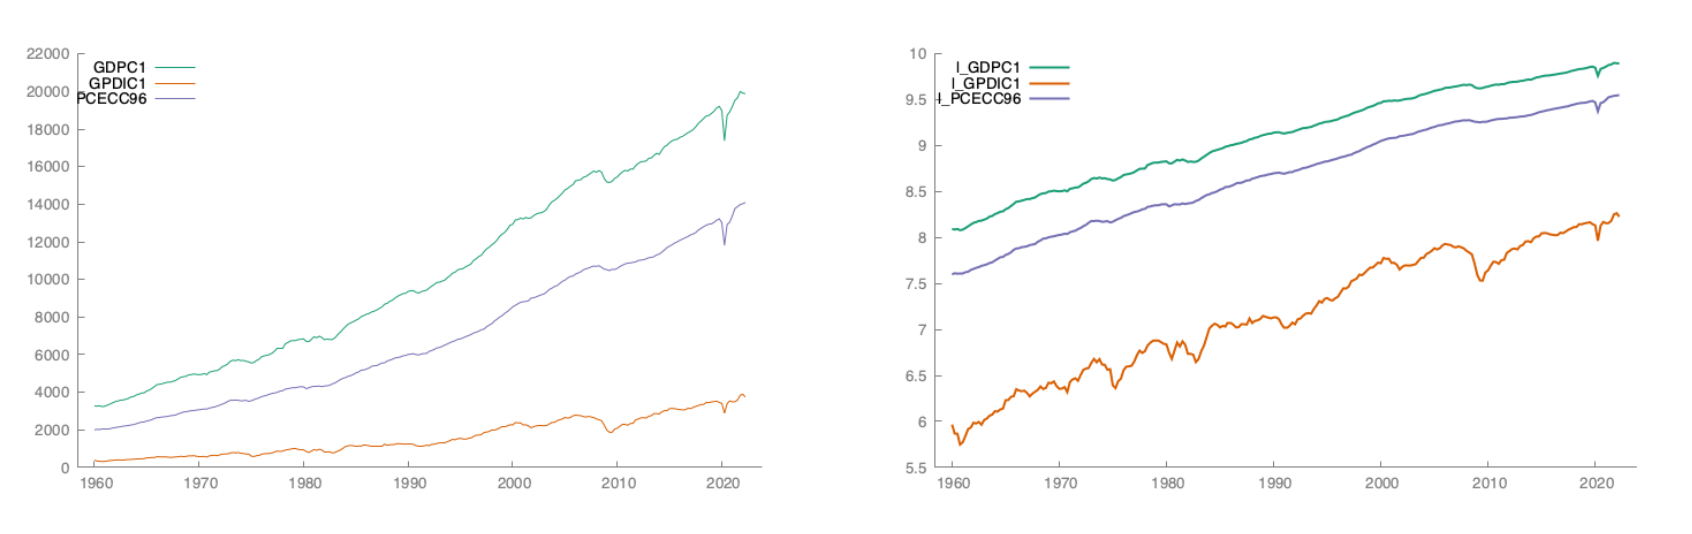


At the left there is a linear scale, at the right - log. Every series exhibit an exponential growth trend, while  logs make the series almost linear.   
I guess, logs are better to use in practical analysis, as:
   - linear functions are easier to model and interpret
   - if $y_{t+1}$ is close to $y_t$ (that is our case), from Taylor's espansion we have that $\ln_{y_{t+1} - \ln_{y_t}} = \dfrac{y_{t-1} - y_t}{y_t} = y'_t$ and it is interesting to observe *rate* of growth
   - seasonal multipliers become seasonal shipts that is easier to observe
   

*Use Hodrick-Prescott filter to smooth time series. Use λ = 1600 (default value). Extract residuals (original time series minus smoothed ones). Plot residuals for three time series on the same graph.*


Investments are much more volatile than consumption

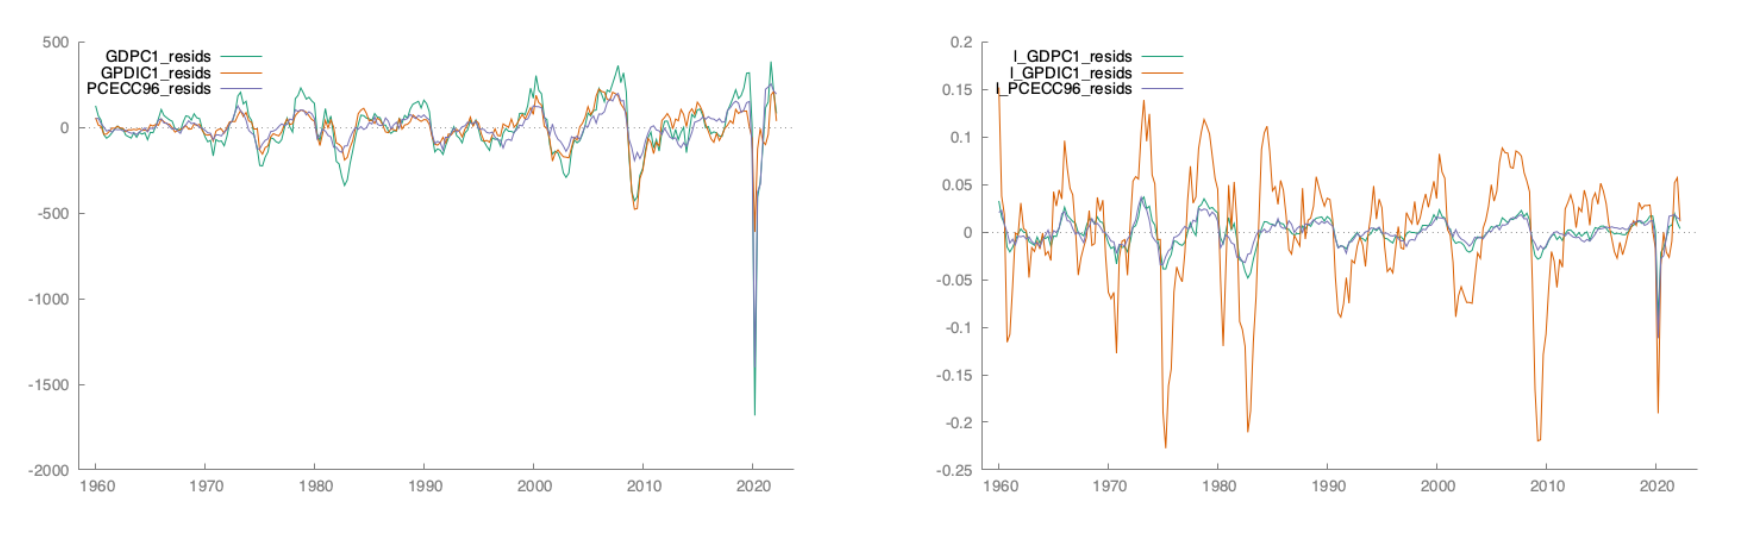


*Plot the trends on the same graph. Describe the results.*

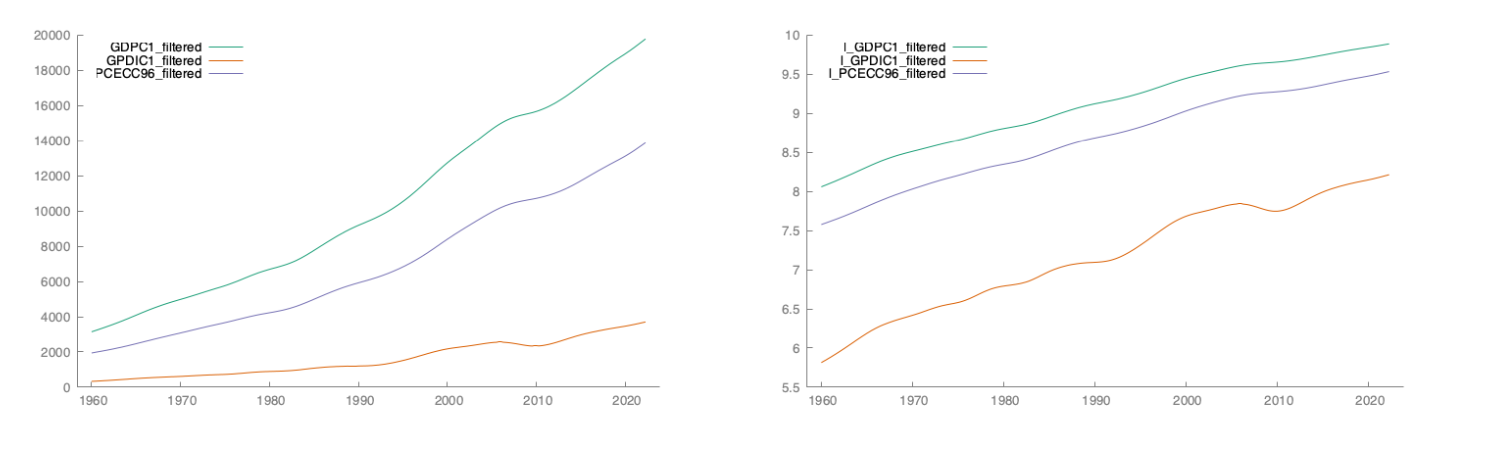


Both for threns and residials we can see than decrease in GDP leads to a severe decrease in investments both in a trend and a cuclic component.
Trend grows exponencially and they are almost parallel, especially GDP and consumption

*Find the variance of cyclical components (residuals) of these three time series. Make a
guess based on the data, which of the three time series had larger fluctuations.*



Var GDP = 30548  
Var Inv = 11010  
Var Con = 14953  

Var log GDP = 0.000241  
Var log Inv = 0.004220  
Var log Con = 0.000195  



As mentioned above, investment may be the variable that has largest fluctuations. Even
though it does not have the greatest variance in absolute value - due to scale the absolute value is  lower than GDP and consumption. But the reletive variance of the investment is the largest and 20 times more than consuption.


*Find the correlation between cyclical components of GDP and consumption. Are the
results you’ve received consistent with Keynesian consumption function (C = a + bY )?*

corr (GDP, Consuption) = 0.85404, thus Keynesian consumption function have to be correct.  
corr (log GDP, log Consuption)  = 0.88116, the same strong linear dependences in logs.

*Plot the histogram of each residual. Are they close to normal distribution? Compare
distribution of levels and logs.*  
GDP  
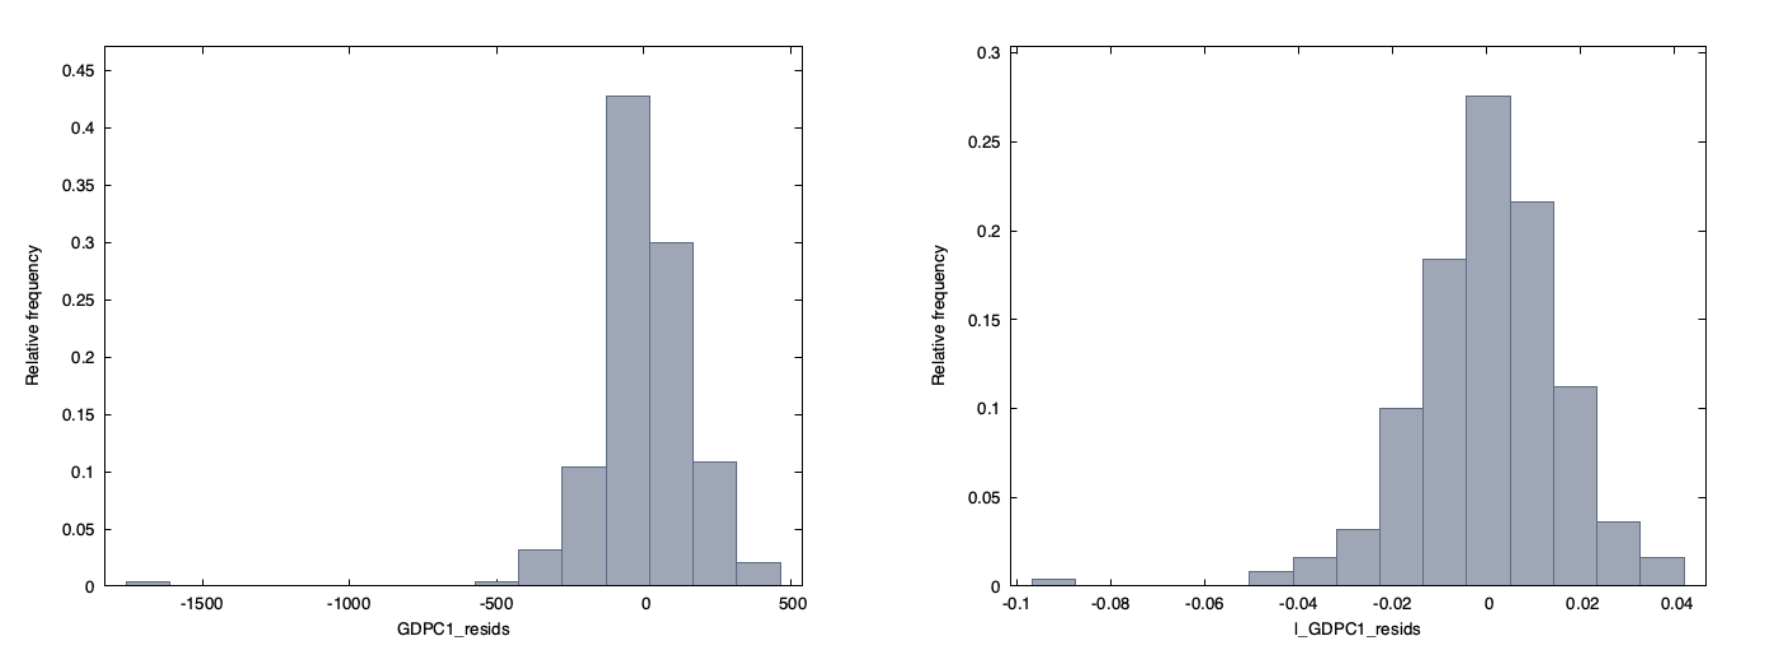

Consumption 
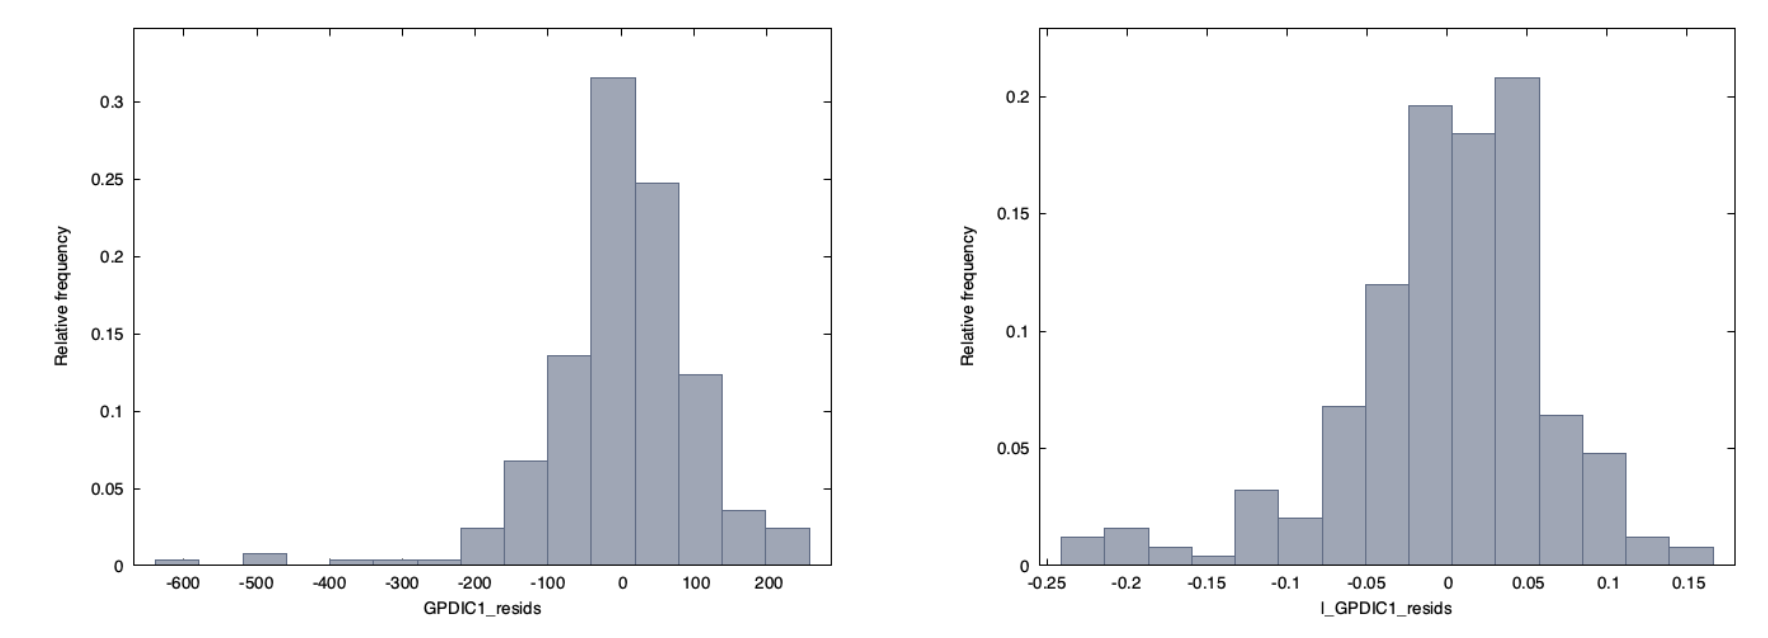

Investment
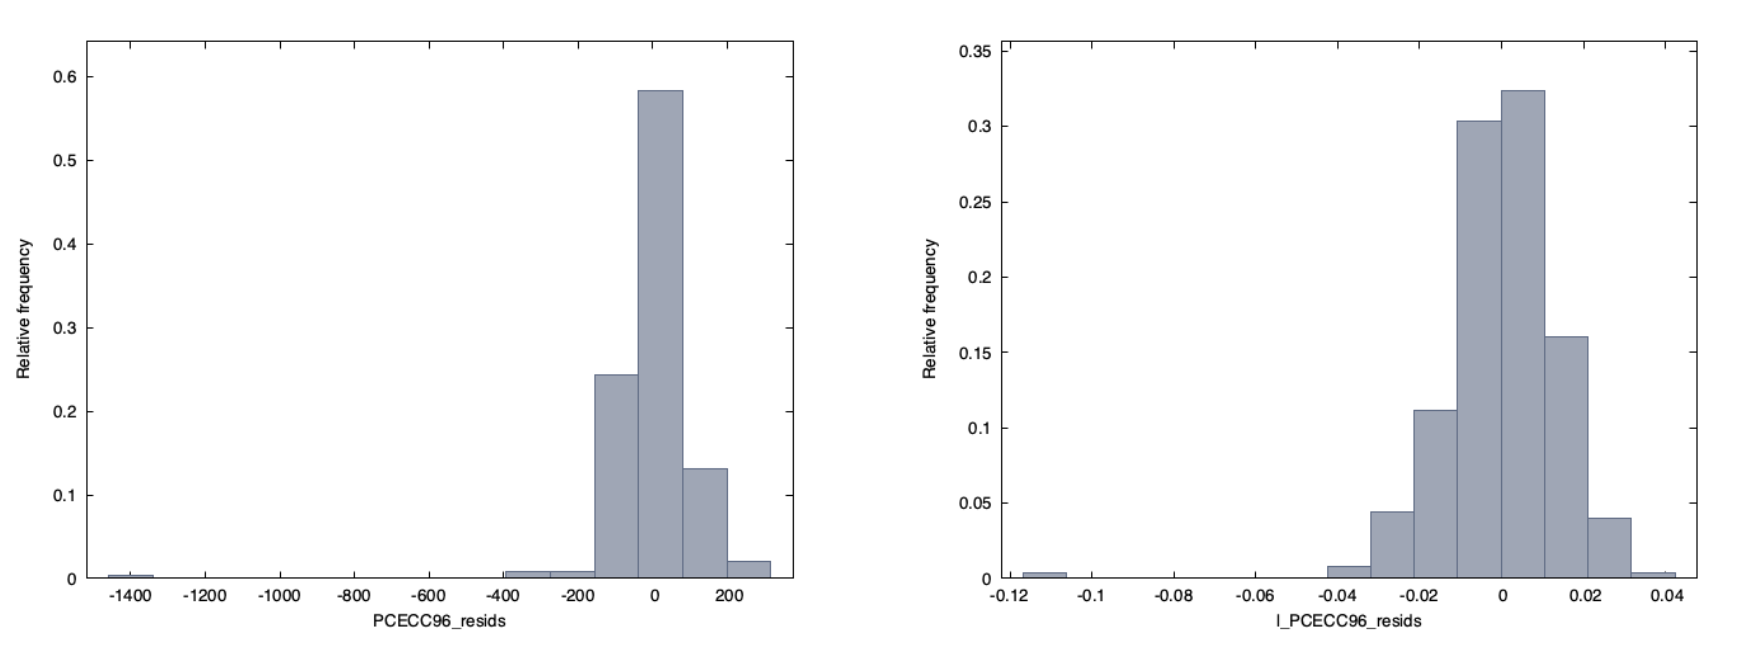


All histograms look like a normal distribution with zero mean, that can be checked with statistical tests. The histograms of logs residuals have larger variance and right tail seems to be a little bit more than the left - just like in the lognormal distribution.

### Problem 2


*Assume that a household has $Q_1 = 120$ and $Q_2 = 224$. It faces the following taxes: $T = 20, \ T = 26$. 
Disposable income equals $Q_i −T_i$. The household has utility function $U(c_1, c_2) = \sqrt{c_1} + \sqrt{c_2} $. The market interest rate is $r = 0.1.$*



We have:
   - $Q_1 = 120, \ Q_2 = 224$  
   - $T_1 = 20, \ T_2 = 26$  
   - $U(c_1, c_2) = u(c_1) + u(c_2) = \sqrt{c_1} + \sqrt{c_2} $
   - $r = 0.1$
   
   
   

   
   
Before we start, I would like to make some remarks about our assumptions and properties of
utility function:  

   __Assumption__: perfect capital market. That means that a household can borrow and lend any amount (at least at the first part of a problem) of money with the same interest rate $r$.  
   
   __Properties of utility finction__: 
   - $\beta = 1:$ that means that a household value the future the same like the present. While tha capital market value the present more as $r = 0.1 > 0$.
   - $u'(0) =  +\infty $. That means that a household cannot survive in a period with zero consumption and in an optimisation problem constraints $c_i \geq$ do not binge.  
   - $u'(\cdot) > 0.$ That means that one-period utility function is strictly increasing. Pretty natural and default assumption. 
   - $u''(\cdot) < 0$. With the previous property that means that one-period utility function is strictly concave. Any additional dollar makes a household happier, but a little mit less than a previous dollar. 
    
   
   
*1. Write down the intertemporal budget constraint. Discuss how the budget constraint will change if the household exogenously receives bequest $b_r$ in period $t = 0$ or leaves bequest $b_l$ in period $t = 2$?*  

First let denote a disposable incame as $\hat{Q} = Q - T$. 

Let me derive IBC starting with every period budget constraints:  
$c_1 + S \leq \hat{Q}_1$  
$c_2 \leq \hat{Q}_2 + (1+r)S$  
where $S$ stands for a household savings from the ferst period to the seconde period. Savings can be either positive or negative or zero.  
That leads us to IBC.  
$c_1 + \dfrac{c_1}{1+r} \leq \hat{Q}_1 + \dfrac{\hat{Q}_2}{1+r}$

Recieveng a bequest $b_r$ makes  adisposoble income at the first period bigger and leads to IBC: 
$c_1 + \dfrac{c_1}{1+r} \leq  (\hat{Q}_1 + b_r) +  \dfrac{\hat{Q}_2}{1+r}$

Leaving a bequest $b_l$ decrease a disposoble income at the second period and leads to IBC: 
$c_1 + \dfrac{c_1}{1+r} \leq  \hat{Q}_1 + \dfrac{\hat{Q}_2 - b_l}{1+r}$




*2. Show the budget constraint and indifference curves on the diagram.*

Let me draw some graphs using matplotlib.

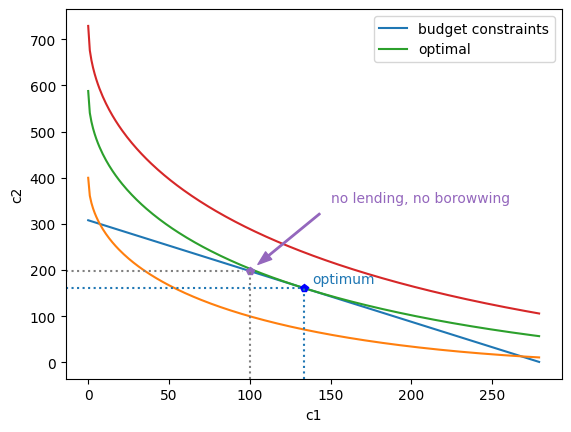

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

plt.style.use('default')

q1 = 100
q2 = 224 - 26
r = 0.1

c1_opt = 133 + 1/3
c2_opt = (1+r)**2*c1_opt

def u(c1, c2):
    return sqrt(c1) + sqrt(c2)

def indifference_curve(c1, u):
    return (u - sqrt(c1))**2

def budget_constraint(c1):
    return q1*(1+r) + q2 - c1*(1+r)

c1_list = [i for i in range (int(q1 + q2/(1+r)))]
# indifference curves and budget constraints
plt.plot(c1_list, [budget_constraint(c1) for c1 in c1_list], label = 'budget constraints')
plt.plot(c1_list, [indifference_curve(c1, 20) for c1 in c1_list])
plt.plot(c1_list, [indifference_curve(c1, u(c1_opt, c2_opt)) for c1 in c1_list], label = 'optimal')
plt.plot(c1_list, [indifference_curve(c1, 27) for c1 in c1_list])
# optimal point
plt.plot(c1_opt, c2_opt, "-p", color = 'b')
plt.axhline(c2_opt, xmin = 0, xmax = c1_opt/len(c1_list), linestyle = 'dotted')
plt.axvline(c1_opt, ymin = 0, ymax = (c2_opt -  plt.ylim()[0])/int(plt.ylim()[1] - plt.ylim()[0]), 
            linestyle = 'dotted')
plt.text(c1_opt+5, c2_opt+10,'optimum', color = 'tab:blue')
# no lending, no borowwing point
plt.plot(q1, q2, "-p")
plt.axhline(q2, xmin = 0, xmax = q1/len(c1_list), linestyle = 'dotted', color = 'grey')
plt.axvline(q1, ymin = 0, ymax = (q2 -  plt.ylim()[0])/int(plt.ylim()[1] - plt.ylim()[0]), 
            linestyle = 'dotted', color = 'grey')
plt.annotate('no lending, no borowwing', xy=(q1, q2), xytext=(q1 + 50, q2+150), color = 'tab:purple',
            arrowprops=dict(color='tab:purple', width = 1.0,headwidth = 7, headlength = 10, shrink = 0.1))

plt.xlabel(xlabel = 'c1')
plt.ylabel(ylabel = 'c2')
plt.legend()
plt.show()

Red curve is the indifference curve with utility level more than a household can afford.  
Orange curve is the indifference curve with utlity level that a household can afford, but is not optimal.

Please note point "no lending, no borowwing" with coordinates ($\hat{Q}_1, \hat{Q}_2$), i.e. when a household consume all disposoble income every period. This point belongs to a budget constraint curve independently on interest rate $r$.



*3. Calculate optimal consumption in both periods (assume that br = bl = 0). Is the consumer a borrower or a lender?*

Let me state our optimisational problem:

$$\max \limits_{c_1, c_2} \sqrt{c_1} + \sqrt{c_2}$$
$$c_1 + \dfrac{c_1}{1+r} = \hat{Q}_1 + \dfrac{\hat{Q}_2}{1+r}$$  
$$c_1 \geq 0, \ c_2 \geq 0$$

Please note that for the sake of simplicity I use _equality_ constrains instead of inequality becouse utility funstion is strictly increasing - a household do not want to "burn" its savings. Also, as was said at the very beginning, the derivative of utility function at zero is plus infinity and that leads to the fact that. budget constraints di not binge. That is the reason why I do not include them into a lagrangian.

Lagrangian:

$$L = \sqrt{c_1} + \sqrt{c_2} - \lambda (c_1 + \dfrac{c_2}{1+r} - \hat{Q}_1 + \dfrac{\hat{Q}_2}{1+r})$$

FOCs:

$$\dfrac{1}{2\sqrt{c_1}} - \lambda = 0$$  
$$\dfrac{1}{2\sqrt{c_2}} - \dfrac{\lambda}{(1+ r)} = 0$$  
$$c_1 + \dfrac{c_1}{1+r} = \hat{Q}_1 + \dfrac{\hat{Q}_2}{1+r}$$

From the fisrt two equations by exluding $\lambda$ we obtain the Euler's equation:  
$$\dfrac{1}{2\sqrt{c_1}} = \dfrac{1+r}{2\sqrt{c_2}} 
\Leftrightarrow c_2 = (1+r)^2 c_1$$

Finally, if we substitute it into equality budget constraint, we obtain:

$$c_1^* = \dfrac{\hat{Q}_1(1+r) + \hat{Q}_2}{(1+r)(2+r)} = 133.3$$  
$$c_2^* = \dfrac{(\hat{Q}_1(1+r) + \hat{Q}_2)(1+r)}{(2+r)} = 161.3$$  


Note that $c_1 > \hat{Q}_1$ and $c_2 < \hat{Q}_2$, that means that a household is a borrower. We can see this fact on the graph above - the optimal point is on the right side to the "no lending, no borowwing point".





*4. Now additionally assume that household can not borrow money. Repeat the previous questions with this new assumption.*


Let me state our optimisational problem:

$$\max \limits_{c_1, c_2} \sqrt{c_1} + \sqrt{c_2}$$  
$$c_1 + \dfrac{c_1}{1+r} = \hat{Q}_1 + \dfrac{\hat{Q}_2}{1+r}$$    
$$ c_1 - \hat{Q}_1 \leq 0$$


Lagrangian:

$$L = \sqrt{c_1} + \sqrt{c_2} - \lambda (c_1 + \dfrac{c_1}{1+r} - \hat{Q}_1 - \dfrac{\hat{Q}_2}{1+r}) + \mu(c_1 - \hat{Q}_1)$$

FOCs:

$$\dfrac{1}{2\sqrt{c_1}} - \lambda + \mu = 0$$  
$$\dfrac{1}{2\sqrt{c_1}} - (1+ r)\lambda = 0$$  
$$c_1 + \dfrac{c_2}{1+r} = \hat{Q}_1 + \dfrac{\hat{Q}_2}{1+r}$$  
$$\mu \geq 0$$  
$$\mu(c_1 - \hat{Q}_1) = 0$$
$$(c_1 - \hat{Q}_1) \leq 0$$


Trying to put $\mu = 0$ leads us to the optimal point the same like in the previous part that violates the inequality constraint. Thus $c_1 = \hat{Q}_1$ and we have the optimal $c_2$ from IBC. (Easy to see that $\mu > 0$ and the statement of the KKT-theorem holds and it is sufficient as utility fuction is strictly concave)

$$c_1^* = \hat{Q}_1 = 100 \text{ and } c_2^* = \hat{Q}_2 = 198$$  
 
Let me graph new budget constriant and old and new optima to see the difference.

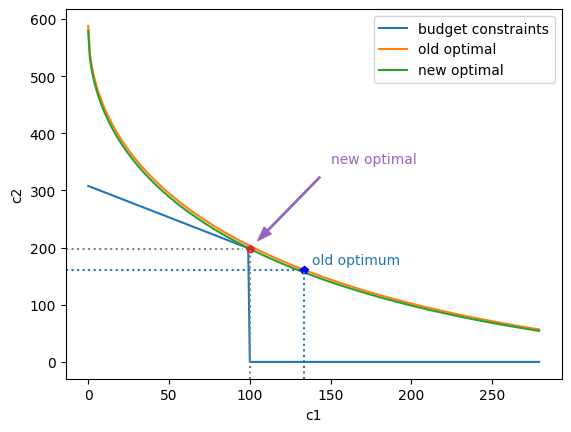

New optimal with no borowwing = 24.07124727947029is less than Old optimal with  borrowing = 24.248711305964285


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

plt.style.use('default')

q1 = 100
q2 = 224 - 26
r = 0.1

c1_opt = 133 + 1/3
c2_opt = (1+r)**2*c1_opt

def u(c1, c2):
    return sqrt(c1) + sqrt(c2)

def indifference_curve(c1, u):
    return (u - sqrt(c1))**2

def budget_constraint(c1):
    return q1*(1+r) + q2 - c1*(1+r)

c1_list = [i for i in range (int(q1 + q2/(1+r)))]
# indifference curves and budget constraints
plt.plot(c1_list, [budget_constraint(c1) if c1< q1 else 0 for c1 in c1_list ], label = 'budget constraints')
# plt.plot(c1_list, [indifference_curve(c1, 20) for c1 in c1_list])
plt.plot(c1_list, [indifference_curve(c1, u(c1_opt, c2_opt)) for c1 in c1_list], label = 'old optimal')
plt.plot(c1_list, [indifference_curve(c1, u(q1, q2)) for c1 in c1_list], label = 'new optimal')


# plt.plot(c1_list, [indifference_curve(c1, 27) for c1 in c1_list])
# optimal point
plt.plot(c1_opt, c2_opt, "-p", color = 'b')
plt.axhline(c2_opt, xmin = 0, xmax = c1_opt/len(c1_list), linestyle = 'dotted')
plt.axvline(c1_opt, ymin = 0, ymax = (c2_opt -  plt.ylim()[0])/int(plt.ylim()[1] - plt.ylim()[0]), 
            linestyle = 'dotted')
plt.text(c1_opt+5, c2_opt+10,'old optimum', color = 'tab:blue')
# no lending, no borowwing point
plt.plot(q1, q2, "-p")
plt.axhline(q2, xmin = 0, xmax = q1/len(c1_list), linestyle = 'dotted', color = 'grey')
plt.axvline(q1, ymin = 0, ymax = (q2 -  plt.ylim()[0])/int(plt.ylim()[1] - plt.ylim()[0]), 
            linestyle = 'dotted', color = 'grey')
plt.annotate('new optimal', xy=(q1, q2), xytext=(q1 + 50, q2+150), color = 'tab:purple',
            arrowprops=dict(color='tab:purple', width = 1.0,headwidth = 7, headlength = 10, shrink = 0.1))

plt.xlabel(xlabel = 'c1')
plt.ylabel(ylabel = 'c2')
plt.legend()
plt.show()

print(f'New optimal with no borowwing = {u(q1, q2)}\
is less than Old optimal with  borrowing = {u(c1_opt, c2_opt)}')


As a household was a net borrower, __prohibiting borowwing makes a household less happy__ and his new behaviour is a point "no lending, no borrowing". This is natural - an agent would like to spend more in the first period ans spend all he can with zero borrowing

*5. For each case check whether the Ricardian Eqivalence holds. Explain intuitively.*

My apriori intuition: in the first case with perfect capital market a household do not care as tax changes do not affect IBC. At the second case huge taxes can seriosly affect a household as there is no possibility to borrow money to survive trought tough times.

Let me show it more formally:

__The perfect capital market:__ 

Let new taxes are $T'_1 = T_1 + \Delta$ and then $T'_2 = T_2 - \Delta(1+r)$ (in order to balance the whole taxes
as the government runs an intertemporally balanced budget).  
IBC before changes:  

$$c_1 + \dfrac{c_2}{1+r} \leq (Q_1 - T_1) + \dfrac{Q_2 - T_2}{1+r}$$

IBC after changes:  
$$c_1 + \dfrac{c_2}{1+r} \leq  (Q_1 - T'_1) + \dfrac{Q_2 - T'_2}{1+r} = (Q_1 - T_1 - \Delta) + \dfrac{Q_2 - T_2 + \Delta(1+r)}{1+r} = (Q_1 - T_1) + \dfrac{Q_2 - T_2}{1+r} $$

That is IBC do not change! But let me draw how a household's budget constrains change.

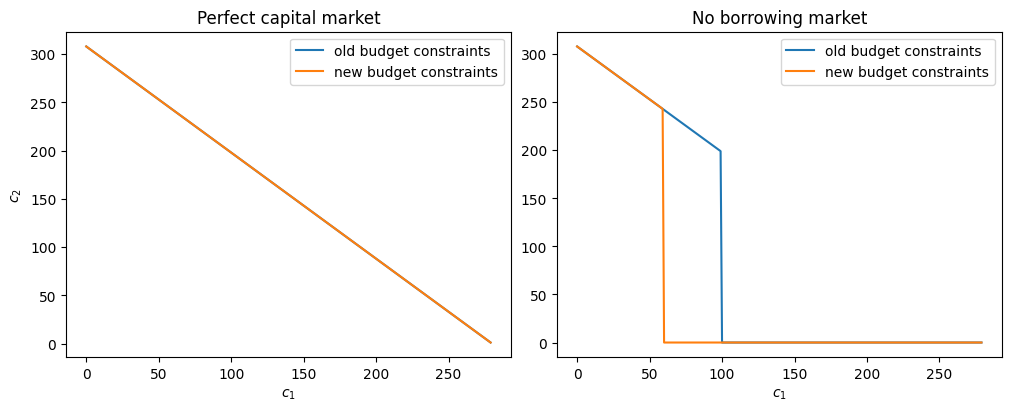

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

plt.style.use('default')

q1 = 100
q2 = 224 - 26
r = 0.1

c1_opt = 133 + 1/3
c2_opt = (1+r)**2*c1_opt

def u(c1, c2):
    return sqrt(c1) + sqrt(c2)

def indifference_curve(c1, u):
    return (u - sqrt(c1))**2

def budget_constraint(c1):
    return q1*(1+r) + q2 - c1*(1+r)



c1_list = [i for i in range (int(q1 + q2/(1+r)))]


fig, axs = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)


axs[0].plot(c1_list, [budget_constraint(c1) for c1 in c1_list], label = 'old budget constraints')
axs[0].plot(c1_list, [budget_constraint(c1) for c1 in c1_list], label = 'new budget constraints')
# indifference curves and budget constraints
axs[1].plot(c1_list, [budget_constraint(c1) if c1< q1 else 0 for c1 in c1_list ], label = 'old budget constraints')
axs[1].plot(c1_list, [budget_constraint(c1) if c1< q1 - 40 else 0 for c1 in c1_list ], label = 'new budget constraints')
# plt.plot(c1_list, [indifference_curve(c1, 20) for c1 in c1_list])
# axs[1].plot(c1_list, [indifference_curve(c1, u(c1_opt, c2_opt)) for c1 in c1_list], label = 'old optimal')
# plt.plot(c1_list, [indifference_curve(c1, u(q1, q2)) for c1 in c1_list], label = 'new optimal')

axs[0].set_title('Perfect capital market')
axs[1].set_title('No borrowing market')


axs[0].set_xlabel('$c_1$')
axs[0].set_ylabel('$c_2$')
axs[1].set_xlabel('$c_1$')


axs[0].legend()
axs[1].legend()


plt.show()




Here we can see that in the first case of a perfect capital market budget constrains are just the same, while in the second case the feasible area became smaller. 

A borrower does not better off in the second case as it can be that there is neither enough disposoble income in the first period nor a possibility to borrow. 

In our problem that we have beeb discussing a household is a borrower in increasing taxes in the first period makes him les happier. We can see it below on the graph:

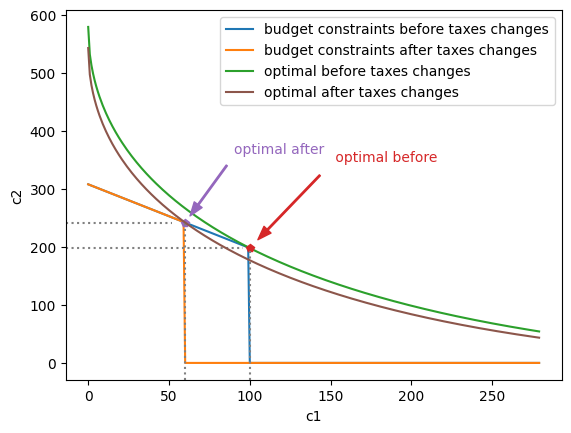

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

plt.style.use('default')

q1 = 100
q2 = 224 - 26
r = 0.1

c1_opt = 133 + 1/3
c2_opt = (1+r)**2*c1_opt

def u(c1, c2):
    return sqrt(c1) + sqrt(c2)

def indifference_curve(c1, u):
    return (u - sqrt(c1))**2

def budget_constraint(c1):
    return q1*(1+r) + q2 - c1*(1+r)

c1_list = [i for i in range (int(q1 + q2/(1+r)))]
# indifference curves and budget constraints
plt.plot(c1_list, [budget_constraint(c1) if c1< q1 else 0 for c1 in c1_list ], 
         label = 'budget constraints before taxes changes')
plt.plot(c1_list, [budget_constraint(c1) if c1< q1-40 else 0 for c1 in c1_list ],
         label = 'budget constraints after taxes changes')


# plt.plot(c1_list, [indifference_curve(c1, 20) for c1 in c1_list])
# plt.plot(c1_list, [indifference_curve(c1, u(c1_opt, c2_opt)) for c1 in c1_list], label = 'old optimal')
plt.plot(c1_list, [indifference_curve(c1, u(q1, q2)) for c1 in c1_list], label = 'optimal before taxes changes')


# plt.plot(c1_list, [indifference_curve(c1, 27) for c1 in c1_list])
# optimal point
# plt.plot(c1_opt, c2_opt, "-p", color = 'b')
# plt.axhline(c2_opt, xmin = 0, xmax = c1_opt/len(c1_list), linestyle = 'dotted')
# plt.axvline(c1_opt, ymin = 0, ymax = (c2_opt -  plt.ylim()[0])/int(plt.ylim()[1] - plt.ylim()[0]), 
#             linestyle = 'dotted')
# plt.text(c1_opt+5, c2_opt+10,'old optimum', color = 'tab:blue')
# no lending, no borowwing point
plt.plot(q1, q2, "-p")
plt.axhline(q2, xmin = 0, xmax = q1/len(c1_list), linestyle = 'dotted', color = 'grey')
plt.axvline(q1, ymin = 0, ymax = (q2 -  plt.ylim()[0])/int(plt.ylim()[1] - plt.ylim()[0]), 
            linestyle = 'dotted', color = 'grey')
plt.annotate(' optimal before', xy=(q1, q2), xytext=(q1 + 50, q2+150), color = 'tab:red',
            arrowprops=dict(color='tab:red', width = 1.0,headwidth = 7, headlength = 10, shrink = 0.1))


plt.plot(q1-40, q2 + 40*1.1, "-p")
q1 = q1 - 40
q2 = q2 + 40*1.1
plt.axhline(q2, xmin = 0, xmax = q1/len(c1_list), linestyle = 'dotted', color = 'grey')
plt.axvline(q1, ymin = 0, ymax = (q2 -  plt.ylim()[0])/int(plt.ylim()[1] - plt.ylim()[0]), 
            linestyle = 'dotted', color = 'grey')
plt.annotate('optimal after', xy=(q1, q2), xytext=(q1 + 30, q2+120), color = 'tab:purple',
            arrowprops=dict(color='tab:purple', width = 1.0,headwidth = 7, headlength = 10, shrink = 0.1))
plt.plot(c1_list, [indifference_curve(c1, u(q1, q2)) for c1 in c1_list], label = 'optimal after taxes changes')




plt.xlabel(xlabel = 'c1')
plt.ylabel(ylabel = 'c2')
plt.legend()
plt.show()




### Problem 3 (Lenders and Borrowers) 
*Assume the following utility function: $U(c_1,c_2) = \log {c_1} + \dfrac{1}{1 + \rho} \log{c_2}$. Assume that a share $\alpha$ of consumers receive income only in the first period ($Y_1$) and the rest (share $1 − \alpha$ of consumers) – only in the second one ($Y_2$). Consumers can lend and borrow only from each other.*  
*1. Find the supply and demand of loanable funds for the first period. Express it through income, discounting factor and real interest rate r. (Here you are asked to calculate the amount that an individual of each type lends/borrows and then use it to construct demand and supply)*


Let me state an optimisational problem both for lenders (syperscript $l$) and borrowers (syperscript $b$)

Lender's problem:
$$
 \max _{c_1^b, c_2^b} \log c_1^b+\frac{1}{1+\rho} \log c_2^b  \quad \text { s.t. } \quad c_1^b+\dfrac{c_2^b}{1+r}=\dfrac{Y_2}{1+r}
$$
Lenders solve the following problem:
$$
\max _{c_1^l, c_2^l } \log c_1^l+\dfrac{1}{1+\rho} \log c_2^l   \quad \text { s.t. } \quad c_1^l+\dfrac{c_2^l}{1+r}=Y_1
$$
FOCs for both consumer type:
$$
\begin{gathered}
\dfrac{1}{c_1}=\lambda \\
\dfrac{1+r}{(1+\rho) c_2}=\lambda \Rightarrow \\
c_1=\frac{1+\rho}{1+r} c_2
\end{gathered}
$$
Here we can get a solution for both type of consumers from IBC:
$$
\dfrac{1+\rho}{1+r} c_2^b+\dfrac{1}{1+r} c_2^b=\dfrac{Y_2}{1+r} \Rightarrow c_2^b=\dfrac{1}{2+\rho} Y_2 \Rightarrow c_1^b=\dfrac{1+\rho}{2+\rho} \dfrac{1}{1+r} Y_2
$$
Analougisly:
$$
\dfrac{1+\rho}{1+r} c_2^l+\dfrac{1}{1+r} c_2^l=Y_1 \Rightarrow c_2^l=\dfrac{1+r}{2+\rho} Y_1 \Rightarrow c_1^l=\dfrac{1+\rho}{2+\rho} Y_1
$$
Therefore, we can derive the demand and supply for loanable funds for a representative borrower and lender:
$$
Demand: \ s_b=-c_1^b=-\dfrac{1+\rho}{2+\rho} \dfrac{Y_2}{1+r}
$$

$$
Supply: \ s_l=Y_1 - c_1^l= \dfrac{1}{2+\rho} Y_1
$$




Actually, it is a little bit surprising that savings of lenders do not depend on $r$. That is that supply curve is vertical in (savings, r) axes.

Total money demand and supply (to a constant that equals a total number of citizens):

$$S^{S} =  \dfrac{\alpha}{2+\rho} Y_1 $$
$$S^D = (1 - \alpha)\dfrac{1+\rho}{2+\rho} \dfrac{Y_2}{1+r} $$

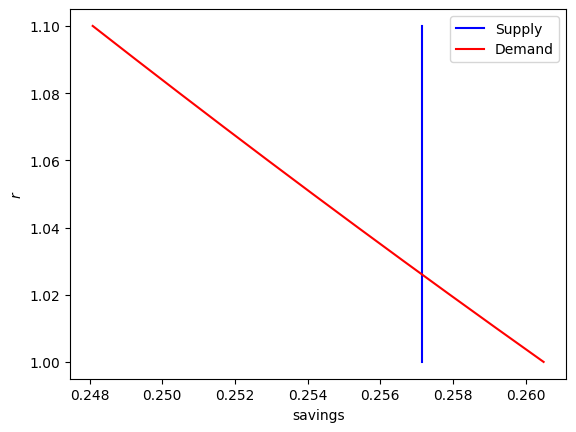

In [6]:
y1 = 100
y2 = 110
rho = 0.1
alpha = 0.0054
def supply(r):
    supply = alpha*y1/(2 + rho)
    return  supply

def demand(r):
    demand = (1 - alpha)*(1+rho)/(2 + rho)/(1+r)
    return demand

r_mass = [1 + i*0.01 for i in range(10+1)]
plt.plot([supply(r) for r in r_mass],r_mass,  'b', label = 'Supply')
plt.plot([demand(r) for r in r_mass], r_mass,  'r', label = 'Demand')
plt.xlabel(xlabel = 'savings')
plt.ylabel(ylabel = '$r$')
plt.legend()
plt.show()

*2. Assume that the government announces a future increase in taxes. How would it affect the equilibrium interest rate? Please provide a graph.*

Let the new second period taxes makes a disposobale income at the second period equal $\mu Y_2$, where $\mu \in (0, 1)$. 
All these tax changes influence anly borrowers, as lenders do not have income at the second period. (A situation can be different if taxes are lump, but I  choose an interpretetion with "percent" taxes). That means that a supply curve do not change.

$$S^D_{new} = (1 - \alpha)\dfrac{1+\rho}{2+\rho} \dfrac{\mu Y_2}{1+r} = \mu S^D$$


From an equilibrium equality $S^D = S^S$ wa can obtain equilibrium interest rate $r^*$:
$$
r^* = \dfrac{1 - \alpha}{\alpha}(1+\rho)\dfrac{\mu Y_2}{Y_1} - 1
$$


We can see that $r^*$ is decreasing in $\mu$, i.e. more taxes lead to smaller $r^*$. Intuition: taxes make people poorer and they cannot afford any good (e.g. a credit) with large price ($r$).


Some more remarks:
   - $\rho \upharpoonright \ \Rightarrow r^* \upharpoonright$ as peaple start to value the future more and they ready to pay more for the future consumption
   - $\alpha \upharpoonright \ \Rightarrow r^* \downharpoonright$ as more people sell money and the price for this good (money) is decreasing.

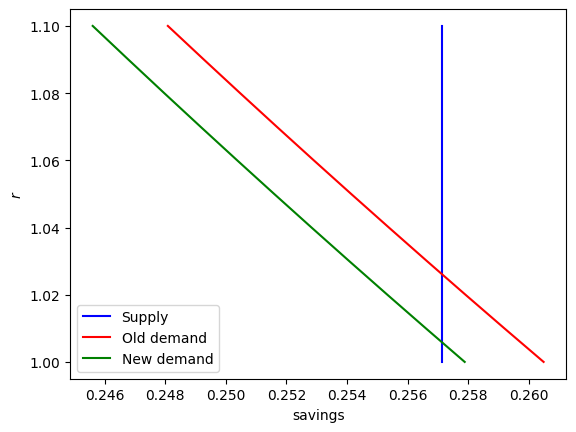

In [7]:
y1 = 100
y2 = 110
rho = 0.1
alpha = 0.0054
def supply(r):
    supply = alpha*y1/(2 + rho)
    return  supply

def demand(r):
    demand = (1 - alpha)*(1+rho)/(2 + rho)/(1+r)
    return demand

r_mass = [1 + i*0.01 for i in range(10+1)]
plt.plot([supply(r) for r in r_mass],r_mass,  'b', label = 'Supply')
plt.plot([demand(r) for r in r_mass], r_mass,  'r', label = 'Old demand')
plt.plot([0.99*demand(r) for r in r_mass], r_mass,  'g', label = 'New demand')


plt.xlabel(xlabel = 'savings')
plt.ylabel(ylabel = '$r$')
plt.legend()
plt.show()

### Problem 4 (Sudden death) 
*Consider an agent who lives for two periods. His utility is $U(c) = \ln(c_1) + E \ln(c_2)$ (the expectation sign is relevant for the last section). Assume that in the first period the agent works and earns $Q$. In the second period he does not work and takes a break. There is no discount. Assume the interest rate is $r$.*  
*1. Is the consumer a net borrower or lender? Show using a graph, and give a very brief explanation.*





__Assumption:__
Untill part 4 of this problem we assume $E \ln(c_1) = \ln(c_1)$, i.e. there is no chance of death or injury or theft or something else.   
An agent cannot live with zero consumption that means that she has to lend some money for the second period (remember that income at the second period is zero). We can see at graph that optimal point lies to the left of a point ($Q_1, 0$), as all indifference curves are symmetric reletavily to the line $c_1 = c_2$.

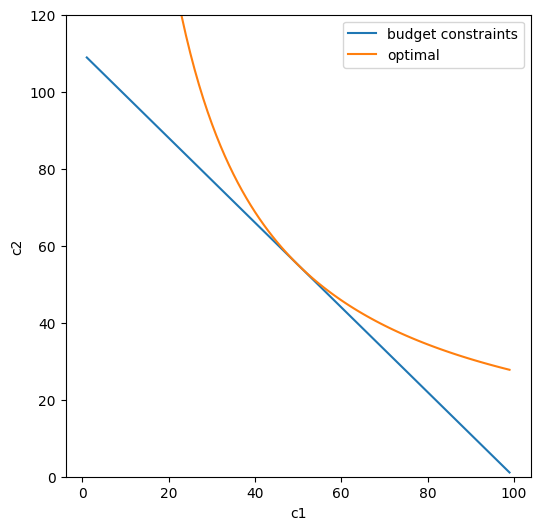

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log, exp
import seaborn as sns

plt.style.use('default')

q1 = 100
q2 = 0
r = 0.1

c1_opt = 50
c2_opt = (1+r)*c1_opt

def u(c1, c2):
    return log(c1) + log(c2)

def indifference_curve(c1, u):
    return (exp(u)/c1)

def budget_constraint(c1):
    return q1*(1+r) + q2 - c1*(1+r)




fig, ax = plt.subplots(figsize=(6, 6))
ax.set_ylim(0, 120)



c1_list = [i for i in range (1, 100)]
# indifference curves and budget constraints
plt.plot(c1_list, [budget_constraint(c1) for c1 in c1_list], label = 'budget constraints')
# plt.plot(c1_list, [indifference_curve(c1, 4) for c1 in c1_list])
plt.plot(c1_list, [indifference_curve(c1, u(c1_opt, c2_opt)) for c1 in c1_list], label = 'optimal')
# plt.plot(c1_list, [indifference_curve(c1, 27) for c1 in c1_list])
# # # optimal point
# plt.plot(c1_opt, c2_opt, "-p", color = 'b')
# plt.axhline(c2_opt, xmin = 0, xmax = c1_opt/len(c1_list), linestyle = 'dotted')
# plt.axvline(c1_opt, ymin = 0, ymax = (c2_opt -  plt.ylim()[0])/int(plt.ylim()[1] - plt.ylim()[0]), 
#             linestyle = 'dotted')
# plt.text(c1_opt+5, c2_opt+10,'optimum', color = 'tab:blue')
# # no lending, no borowwing point
# plt.plot(q1, q2, "-p")
# plt.axhline(q2, xmin = 0, xmax = q1/len(c1_list), linestyle = 'dotted', color = 'grey')
# plt.axvline(q1, ymin = 0, ymax = (q2 -  plt.ylim()[0])/int(plt.ylim()[1] - plt.ylim()[0]), 
#             linestyle = 'dotted', color = 'grey')
# plt.annotate('no lending, no borowwing', xy=(q1, q2), xytext=(q1 + 50, q2+150), color = 'tab:purple',
#             arrowprops=dict(color='tab:purple', width = 1.0,headwidth = 7, headlength = 10, shrink = 0.1))




plt.xlabel(xlabel = 'c1')
plt.ylabel(ylabel = 'c2')
plt.legend()
plt.show()

*2. Evaluate the following statement: “as the subjective discount factor is one, individuals derive the same utility from any given unit of consumption in both periods. Therefore, c1 = c2 and it is not necessary to solve the maximization problem”.*


That is not true as capital market buy money at the first period with price r and an agent can have a good deal by selling money now and consuming later more. That statement would be true if $r$ equals $1$.

*3. Solve the maximization problem of the agent and find c1, c2. Are they equal? How is the result related to the answer to the previous question?*


The optimisational problem:

$$max_{c_1, c_2} \ln{c_1} + \ln{c_2} \quad \text { s.t. } \quad  c_1 + \dfrac{c_2}{1+r} \leq Q$$

Lagrangian:
$$L = \ln{c_1} + \ln{c_2} c_1 + \lambda( Q  - c_1 - \dfrac{c_2}{1+r})$$


Again, as the derivative of the $\ln$ is positive and infinite at zero, we can say that $c_1, \ c_2 \geq 0$ do not binge and equality holds in IBC.  

FOCs:

$$\dfrac{1}{c_1} = \lambda$$

$$\dfrac{1+r}{c_2} = \lambda$$

$$ c_1 + \dfrac{c_2}{1+r} = Q$$


It follows:
$$ c_1 = \dfrac{c_2}{1+r}$$  
$$c_1 = \dfrac{Q}{2}$$  
$$c_2 = \dfrac{Q(1+r)}{2}$$


We can see that $c_1 > c_2$ as was predicted above - an agent lend money and have "additional" $Qr/2$.


*4. Now, assume that the agent is very hardworking. That is why he can die of a heart attack with probability 1 − p just after the first period. Assume that the agent knows about this probability. How will it affect his decisions about c1 and c2? Is c2 higher or lower than in the previous question? Show mathematically and give a brief intuitive explanation.*

Here we have the same problem sliglty modificated as $E\ln{c_2} = p\ln{c_2}$ as with probability $1-p$ an agent dies and have $0$ utility.


The optimisational problem:

$$max_{c_1, c_2} \ln{c_1} + p\ln{c_2} \quad \text { s.t. } \quad  c_1 + \dfrac{c_2}{1+r} \leq Q$$

Lagrangian:
$$L = \ln{c_1} + p\ln{c_2} c_1 + \lambda( Q  - c_1 - \dfrac{c_2}{1+r})$$


Again, as the derivative of the $\ln$ is positive and infinite at zero, we can say that $c_1, \ c_2 \geq 0$ do not binge and equality holds in IBC.  

FOCs:

$$\dfrac{1}{c_1} = \lambda$$

$$\dfrac{p(1+r)}{ c_2} = \lambda$$

$$ c_1 + \dfrac{c_2}{1+r} = Q$$


It follows:
$$ c_1 = \dfrac{c_2}{p(1+r)}$$  
$$c_1 = \dfrac{Q}{1+p}$$  
$$c_2 = \dfrac{pQ(1+r)}{1+p}$$


If $p = 1$ (no death chance) we obtain the result like in the previous section.
Intuition: possibility of death $ 1 - p \upharpoonright$, $p \downharpoonright$, consumpion now $\upharpoonright$, consumpion later $\downharpoonright$

### Problem 5


*Anna and Ivan both obey the two-period model of consumption. Anna earns $70$ in first period
and $70$ in the second period. Ivan earns nothing in the first period and $147$ in the second
period. Both of them can borrow or lend at the same interest rate $r$.*

*1. Observe Anna and Ivan consuming 70 in the first period and 70 in the second period. What can we say for sure the interest rate r?*

We know nothing about utility functions of our friends, so let's start with analyzing IBC both for Anna and Ivan:



__Anna:__
$$
70+\frac{70}{1+r} \leq 70+\frac{70}{1+r} 
$$
we can say nothing  about $r$ from Anna's interporal budget constraint.  
__Ivan:__
$$
70+\frac{70}{1+r} \leq \frac{147}{1+r} \Rightarrow 70(1+r) \leq 77 \Rightarrow r \leq 0.1
$$

Or (if we assume that Ivan's utility function is strictly increasing that is kind of default assumption) equality holds instead of inequality and  
$$r = 0.1$$


Now assume that utility function smooth and we can use Lagrange theorem. It follows that Euler's equation is true:
$$u'(c_1) = \beta (1+r)u'(c_2)$$  
As $c_1 = c_2$ both for Anna and Ivan
$$\beta = \dfrac{1}{1+r}$$  
That means that both Anna and Ivan value the future the same way as the capital market.



*2. Suppose the interest rate increases. What will happen to Anna’s consumption in the first period? Is Anna better off or worse off than before the interest rate rise?*

Here I am using the following assumptions:
   - The utility function has a form $U(c_1, c_2) = u(c_1) + \beta u(c_2)$
   - $u(\cdot)$ is smooth
   - $u(\cdot)$ is strictly increasing or $u'(\cdot) > 0$
   - $u(\cdot)$ is strictly concave or $u''(\cdot) < 0$



It follows that the Euler equation holds:
$$u'(c_1^*) = \beta(1+r)u'(c_2^*)$$

Let $r^{new} = r + \rho$ and that leads to changing consumption (maybe zero) $c_1^{new} = c_1^* - \Delta$ and then to balance IBC it must hold that $c_2^{new} = c_2^* + \Delta(1+r + \rho)$

Please remember that $c_2^* = c_1^*$   

New Euler equation :

$$u'(c_1^* - \Delta) = \beta(1+r+\rho)u'(c_2^* + \Delta(1+r + \rho))$$

From Taylor's series up to $o(\Delta)$:  

$$u'(c_1^*) - u''(c_1^*)\Delta = (u'(c_1^*) + u''(c_1^*)\Delta(1+r+\rho))((1+r+\rho))$$

$$u'(c_1^*) - u''(c_1^*)\Delta = u'(c_1^*)(1+r)\beta + u'(c_1^*)\rho \beta + u''(c_1^*)\Delta (1 + r + \rho)^2 \beta $$  

$$u''(c_1^*)\Delta(1 +(1+r+\rho)^2 \beta) = u'(c_1^*)\rho \beta$$  

$$\Delta = \dfrac{u'(c_1^*)\rho \beta}{u''(c_1^*)(1 +(1+r+\rho)^2 \beta)}$$  

As $u'(\cdot) > 0$ and $u''(\cdot) < 0$, it follows that $\Delta > 0$. That is $c_1^{new} = c_1^* - \Delta$ and $c_1^{new} <  c_1^*$.

__Finally__: $c_1 \downharpoonright$ both for Anna and Ivan.

Now let me provide you with some graphs:

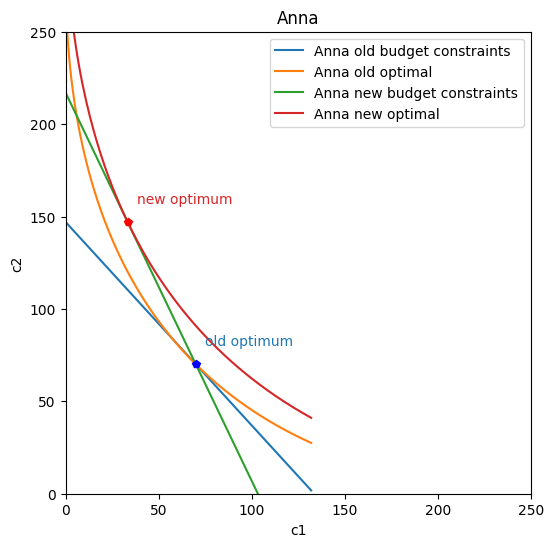

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

plt.style.use('default')

r = 0.1
delta_r = 1.0
beta = 1/(1+r)

q1_anna = 70
q2_anna = 70
c1_anna_opt = 70
c2_anna_opt = 70

c1_anna_opt_new = (q1_anna*(1+r+delta_r) + q2_anna)/(1+r+delta_r)/(2+r+delta_r)
c2_anna_opt_new = c1_anna_opt_new*((1+r+delta_r)**2)

q1_ivan = 0
q2_ivan = 147
c1_ivan_opt = 70
c2_ivan_opt = 70



fig, ax = plt.subplots(figsize=(6, 6))



def concave_u(c1, c2):
    return sqrt(c1) + sqrt(c2)

def concave_indifference_curve(c1, u):
    return (u - sqrt(c1))**2

def budget_constraint(c1, q1, q2, r):
    return q1*(1+r) + q2 - c1*(1+r)



c1_anna_list = [i for i in range (int(q1_anna + q2_anna/(1+r)))]
# indifference curves and budget constraints
plt.plot(c1_anna_list, [budget_constraint(c1, q1_anna, q2_anna, r) for c1 in c1_anna_list ], label = 'Anna old budget constraints')
plt.plot(c1_anna_list, [concave_indifference_curve(c1, concave_u(c1_anna_opt, c2_anna_opt)) for c1 in c1_anna_list], label = 'Anna old optimal')


plt.plot(c1_anna_list, [budget_constraint(c1, q1_anna, q2_anna, r + delta_r) for c1 in c1_anna_list ], label = 'Anna new budget constraints')
plt.plot(c1_anna_list, [concave_indifference_curve(c1, concave_u(c1_anna_opt_new, c2_anna_opt_new)) for c1 in c1_anna_list], label = 'Anna new optimal')



plt.plot(c1_anna_opt, c2_anna_opt, "-p", color = 'b')
plt.plot(c1_anna_opt_new, c2_anna_opt_new, "-p", color = 'r')


# plt.axhline(c2_anna_opt, xmin = 0, xmax = c1_anna_opt/len(c1_anna_list), linestyle = 'dotted')
# plt.axvline(c1_anna_opt, ymin = 0, ymax = (c2_anna_opt -  plt.ylim()[0])/int(plt.ylim()[1] - plt.ylim()[0]), 
#             linestyle = 'dotted')
plt.text(c1_anna_opt+5, c2_anna_opt+10,'old optimum', color = 'tab:blue')

plt.text(c1_anna_opt_new+5, c2_anna_opt_new+10,'new optimum', color = 'tab:red')



ax.set_title('Anna')
ax.set_ylim(0, 250)
ax.set_xlim(0, 250)



plt.xlabel(xlabel = 'c1')
plt.ylabel(ylabel = 'c2')
plt.legend()
plt.show()





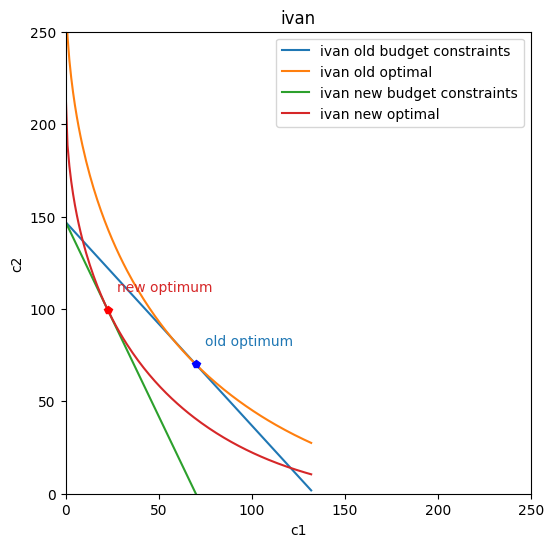

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

plt.style.use('default')

r = 0.1
delta_r = 1.0
beta = 1/(1+r)

q1_anna = 70
q2_anna = 70
c1_anna_opt = 70
c2_anna_opt = 70


q1_ivan = 0
q2_ivan = 147
c1_ivan_opt = 70
c2_ivan_opt = 70

c1_anna_opt_new = (q1_anna*(1+r+delta_r) + q2_anna)/(1+r+delta_r)/(2+r+delta_r)
c2_anna_opt_new = c1_anna_opt_new*((1+r+delta_r)**2)

c1_ivan_opt_new = (q1_ivan*(1+r+delta_r) + q2_ivan)/(1+r+delta_r)/(2+r+delta_r)
c2_ivan_opt_new = c1_ivan_opt_new*((1+r+delta_r)**2)





fig, ax = plt.subplots(figsize=(6, 6))


def concave_u(c1, c2):
    return sqrt(c1) + sqrt(c2)

def concave_indifference_curve(c1, u):
    return (u - sqrt(c1))**2

def budget_constraint(c1, q1, q2, r):
    return q1*(1+r) + q2 - c1*(1+r)



c1_ivan_list = [i for i in range (int(q1_anna + q2_anna/(1+r)))]
# indifference curves and budget constraints
plt.plot(c1_ivan_list, [budget_constraint(c1, q1_ivan, q2_ivan, r) for c1 in c1_ivan_list ], label = 'ivan old budget constraints')
plt.plot(c1_ivan_list, [concave_indifference_curve(c1, concave_u(c1_ivan_opt, c2_ivan_opt)) for c1 in c1_anna_list], label = 'ivan old optimal')


plt.plot(c1_ivan_list, [budget_constraint(c1, q1_ivan, q2_ivan, r + delta_r) for c1 in c1_ivan_list ], label = 'ivan new budget constraints')
plt.plot(c1_ivan_list, [concave_indifference_curve(c1, concave_u(c1_ivan_opt_new, c2_ivan_opt_new)) for c1 in c1_ivan_list], label = 'ivan new optimal')



plt.plot(c1_ivan_opt, c2_ivan_opt, "-p", color = 'b')
plt.plot(c1_ivan_opt_new, c2_ivan_opt_new, "-p", color = 'r')


# plt.axhline(c2_anna_opt, xmin = 0, xmax = c1_anna_opt/len(c1_anna_list), linestyle = 'dotted')
# plt.axvline(c1_anna_opt, ymin = 0, ymax = (c2_anna_opt -  plt.ylim()[0])/int(plt.ylim()[1] - plt.ylim()[0]), 
#             linestyle = 'dotted')
plt.text(c1_ivan_opt+5, c2_ivan_opt+10,'old optimum', color = 'tab:blue')

plt.text(c1_ivan_opt_new+5, c2_ivan_opt_new+10,'new optimum', color = 'tab:red')



ax.set_title('ivan')
ax.set_ylim(0, 250)
ax.set_xlim(0, 250)



plt.xlabel(xlabel = 'c1')
plt.ylabel(ylabel = 'c2')
plt.legend()
plt.show()




We can see from graphs that consumption in the first period decreased. Anna better off, Ivan does not. But these graphs are just graphs, let me explain why both statement are true.

__Anna's__ effects: 
   - substitution effect: $c_2$ becomes relatively cheaper, and $c_1$ becomes relatively more expensive. Hence, due to this effect, if the interest rate rises, we want to consume less now, save more and consume more in the future.
   - income effect: As Anna is neither lender nor borrower, income effect equals zero. 

Conclusion for Anna:
   - Consumption of $c_1$ is decreasing due to substitution effect.
   - Anna is better off after the interest rate increase. The initial consumption is still feasible, but she can choose a different one, with greater utility. (Actually, this is not true for some utility functions, e.g. Leontieff that is neither differentiable not strictly concave)
   
   
   __Ivan's__ effects: 
   - substitution effect: $c_2$ becomes relatively cheaper, and $c_1$ becomes relatively more expensive. Hence, due to this effect, if the interest rate rises, we want to consume less now, save more and consume more in the future.
   - income effect: As Ivan is a borrower, income effect makes his borrowing more expensive that reduce his total wealth (we can see that new optimal indifference curve has less utility valye) and reduce $c_1$ 

Conclusion for Anna:
   - Consumption of $c_1$ is decreasing due to both substitution and income effect.
   - Ivan is not  better off after the interest rate increase. The initial consumption is no more feasible, due to income effect and the fact that Ivan is a borrower.